# KMeans Predictive Cluster Models for Crime Victim Analysis:
## A. C. Coffin 
### 11/10/2023
### Northwestern Missouri State University
### MS Data Analytics Capstone
---
### Introduction:
DBSCAN is a very large algorythm to run, in this case the data has been limited to a single month worth of crimes due to the size of the data set. This is to demonstrate the amount of crime and its clustering over the period of 2023 May 23 to 2023 June 23. 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score as ss

NYPD = pd.read_csv('Data/ML_PreProcess/NYPDv4ML.csv')
NYPD

C:\Users\Tower\AppData\Local\Temp\ipykernel_11440\3622369032.py:6: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



rpt_num  addr_pct_cd        boro_nm  boro_num   rpt_fr_de  \
0        261177965           17      MANHATTAN         1  12/31/2022   
1        261196077           75       BROOKLYN         2    1/1/2023   
2        261233709           81       BROOKLYN         2    1/2/2023   
3        261236460           67       BROOKLYN         2    1/2/2023   
4        261253958           73       BROOKLYN         2    1/2/2023   
...            ...          ...            ...       ...         ...   
87019  266907857H1           49          BRONX         3    8/6/2022   
87020  269739365H1           60       BROOKLYN         2   6/13/2023   
87021  261843719H1          104         QUEENS         4   1/11/2023   
87022  270214034H1          121  STATEN ISLAND         5   6/21/2023   
87023  268067163H1          113         QUEENS         4   5/10/2023   

       rpt_fr_dtm crm_atpt_cptd_cd  ky_cd  ct_m  ncic  ...  pd_cd  \
0           44926        COMPLETED    578     1  1313  ...  637.0   
1           44927        COMPLETED    578     1  1313  ...  637.0   
2           44928        COMPLETED    578     1  1313  ...  638.0   
3           44928        COMPLETED    578     1  1313  ...  637.0   
4           44928        COMPLETED    578     1  1313  ...  638.0   
...           ...              ...    ...   ...   ...  ...    ...   
87019       44779        COMPLETED    101     2  1301  ...    NaN   
87020       45090        COMPLETED    101     2  1301  ...    NaN   
87021       44937        COMPLETED    101     2  1301  ...    NaN   
87022       45098        COMPLETED    101     2  1301  ...    NaN   
87023       45056        COMPLETED    101     2  1301  ...    NaN   

                          pd_desc age_group age_gm  x_coord_cd  y_coord_cd  \
0      HARASSMENT,SUBD 1,CIVILIAN   UNKNOWN      6      991717      214547   
1      HARASSMENT,SUBD 1,CIVILIAN   UNKNOWN      6     1014120      181866   
2           HARASSMENT,SUBD 3,4,5   UNKNOWN      6     1002234      191029   
3      HARASSMENT,SUBD 1,CIVILIAN   UNKNOWN      6     1005061      181044   
4           HARASSMENT,SUBD 3,4,5   UNKNOWN      6     1005994      182105   
...                           ...       ...    ...         ...         ...   
87019                      (null)     25-44      3     1028555      246897   
87020                      (null)     25-44      3      987828      149692   
87021                      (null)     18-24      2     1010041      203018   
87022                      (null)     18-24      2      941400      167659   
87023                      (null)       <18      1     1051618      189117   

             lat        lon                  lat_lon  \
0      40.755557 -73.973048  (40.755557, -73.973048)   
1      40.665808 -73.892329  (40.665808, -73.892329)   
2      40.690991 -73.935150   (40.690991, -73.93515)   
3      40.663578 -73.924986  (40.663578, -73.924986)   
4      40.666486 -73.921619  (40.666486, -73.921619)   
...          ...        ...                      ...   
87019  40.844240 -73.839868   (40.84424, -73.839868)   
87020  40.577547 -73.987117  (40.577547, -73.987117)   
87021  40.723879 -73.906951  (40.723879, -73.906951)   
87022  40.626760 -74.154365   (40.62676, -74.154365)   
87023  40.685504 -73.757092  (40.685504, -73.757092)   

           new georeferenced column  
0      POINT (-73.973048 40.755557)  
1      POINT (-73.892329 40.665808)  
2       POINT (-73.93515 40.690991)  
3      POINT (-73.924986 40.663578)  
4      POINT (-73.921619 40.666486)  
...                             ...  
87019   POINT (-73.839868 40.84424)  
87020  POINT (-73.987117 40.577547)  
87021  POINT (-73.906951 40.723879)  
87022   POINT (-74.154365 40.62676)  
87023  POINT (-73.757092 40.685504)  

[87024 rows x 21 columns]

In [36]:
NYPD.columns

Index(['rpt_num', 'addr_pct_cd', 'boro_nm', 'boro_num', 'rpt_fr_de',
       'rpt_fr_dtm', 'crm_atpt_cptd_cd', 'ky_cd', 'ct_m', 'ncic', 'ofns_desc',
       'pd_cd', 'pd_desc', 'age_group', 'age_gm', 'x_coord_cd', 'y_coord_cd',
       'lat', 'lon', 'lat_lon', 'new georeferenced column'],
      dtype='object')

In [37]:
NYPD.shape

(87024, 21)

In [38]:
# Using Jan 2023 to June 2023
n = 32349
NYPD.iloc[:n]
NYPD1 = NYPD.iloc[:n]
NYPD1.shape

(32349, 21)

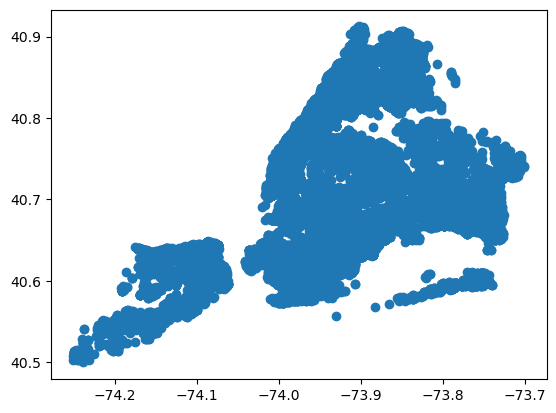

In [39]:
# Lat and Lon to create geographical clustering
lat_lon = NYPD1[['lat', 'lon']]
lat, longg = NYPD1.lat, NYPD1.lon
plt.scatter(longg, lat)

Initial shape of the data, to generate the basic shape of the data.

In [40]:
# Shape of the model
from sklearn.cluster import DBSCAN
X = lat_lon.to_numpy()
X.shape

(32349, 2)

In [41]:
#Start of the model
dbscan_cluster_model = DBSCAN(eps=0.2, min_samples=15).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.2, min_samples=15)

In [42]:
#Establishing cluster labels
dbscan_cluster_model.labels_


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#adding to NYPD1
NYPD1.insert(loc=21, column='cluster', value= dbscan_cluster_model.labels_)
NYPD1

rpt_num  addr_pct_cd    boro_nm  boro_num   rpt_fr_de  rpt_fr_dtm  \
0      261177965           17  MANHATTAN         1  12/31/2022       44926   
1      261196077           75   BROOKLYN         2    1/1/2023       44927   
2      261233709           81   BROOKLYN         2    1/2/2023       44928   
3      261236460           67   BROOKLYN         2    1/2/2023       44928   
4      261253958           73   BROOKLYN         2    1/2/2023       44928   
...          ...          ...        ...       ...         ...         ...   
32344  266944782           79   BROOKLYN         2   4/18/2023       45034   
32345  266944794          102     QUEENS         4   4/10/2023       45026   
32346  266986007          107     QUEENS         4   4/14/2023       45030   
32347  267000109          105     QUEENS         4   3/28/2023       45013   
32348  267050146           52      BRONX         3   4/20/2023       45036   

      crm_atpt_cptd_cd  ky_cd  ct_m  ncic  ...                     pd_desc  \
0            COMPLETED    578     1  1313  ...  HARASSMENT,SUBD 1,CIVILIAN   
1            COMPLETED    578     1  1313  ...  HARASSMENT,SUBD 1,CIVILIAN   
2            COMPLETED    578     1  1313  ...       HARASSMENT,SUBD 3,4,5   
3            COMPLETED    578     1  1313  ...  HARASSMENT,SUBD 1,CIVILIAN   
4            COMPLETED    578     1  1313  ...       HARASSMENT,SUBD 3,4,5   
...                ...    ...   ...   ...  ...                         ...   
32344        COMPLETED    361     1  1313  ...     AGGRAVATED HARASSMENT 2   
32345        COMPLETED    361     1  1313  ...     AGGRAVATED HARASSMENT 2   
32346        COMPLETED    361     1  1313  ...     AGGRAVATED HARASSMENT 2   
32347        COMPLETED    361     1  1313  ...     AGGRAVATED HARASSMENT 2   
32348        COMPLETED    361     1  1313  ...     AGGRAVATED HARASSMENT 2   

       age_group age_gm x_coord_cd  y_coord_cd        lat        lon  \
0        UNKNOWN      6     991717      214547  40.755557 -73.973048   
1        UNKNOWN      6    1014120      181866  40.665808 -73.892329   
2        UNKNOWN      6    1002234      191029  40.690991 -73.935150   
3        UNKNOWN      6    1005061      181044  40.663578 -73.924986   
4        UNKNOWN      6    1005994      182105  40.666486 -73.921619   
...          ...    ...        ...         ...        ...        ...   
32344        <18      1     998728      192685  40.695541 -73.947786   
32345        <18      1    1025848      190094  40.688344 -73.850002   
32346        <18      1    1035980      206038  40.732054 -73.813346   
32347        <18      1    1045134      181150  40.663683 -73.780542   
32348        <18      1    1010341      254554  40.865329 -73.905668   

                       lat_lon      new georeferenced column cluster  
0      (40.755557, -73.973048)  POINT (-73.973048 40.755557)       0  
1      (40.665808, -73.892329)  POINT (-73.892329 40.665808)       0  
2       (40.690991, -73.93515)   POINT (-73.93515 40.690991)       0  
3      (40.663578, -73.924986)  POINT (-73.924986 40.663578)       0  
4      (40.666486, -73.921619)  POINT (-73.921619 40.666486)       0  
...                        ...                           ...     ...  
32344  (40.695541, -73.947786)  POINT (-73.947786 40.695541)       0  
32345  (40.688344, -73.850002)  POINT (-73.850002 40.688344)       0  
32346  (40.732054, -73.813346)  POINT (-73.813346 40.732054)       0  
32347  (40.663683, -73.780542)  POINT (-73.780542 40.663683)       0  
32348  (40.865329, -73.905668)  POINT (-73.905668 40.865329)       0  

[32349 rows x 22 columns]

In [44]:
# Cluster Values
NYPD1['cluster'].value_counts()

0    32349
Name: cluster, dtype: int64

Lack of clustering, need to modify epsilon to create clusters.

In [45]:
import plotly.express as px

fig = px.scatter(x=longg, y=lat, color=NYPD1['cluster'])
fig.show()

# Optimizing grid search for epsilon:

In [47]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [48]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [49]:
import itertools

combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [50]:
# Number of combinations generated
N = len(combinations)
N

90

DBSCAN is not deterministic, so be sure to collect labels

In [52]:
def get_scores_and_labels(combinations, X):
    scores = []
    all_labels_list = []

    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
        if (num_clusters < 2) or (num_clusters > 50):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters.")
            continue

        scores.append(ss(X, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumCluster{num_clusters}")

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]
    return{'best_epsilon': best_parameters[0],
           'best_min_samples': best_parameters[1],
           'best_labels': best_labels,
           'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Index: 0, Score: -0.09471833448991157, Labels: [0 0 0 ... 0 0 0], NumCluster10
Index: 1, Score: 0.020561007122403555, Labels: [0 0 0 ... 0 0 0], NumCluster7
Index: 2, Score: 0.09243632141744466, Labels: [0 0 0 ... 0 0 0], NumCluster6
Index: 3, Score: 0.2767659329505395, Labels: [0 0 0 ... 0 0 0], NumCluster5
Index: 4, Score: 0.2777711471454276, Labels: [0 0 0 ... 0 0 0], NumCluster5
Index: 5, Score: 0.32377577170777866, Labels: [0 0 0 ... 0 0 0], NumCluster5
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 1 clusters.
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 1 clusters.
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 1 clusters.
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 1 clusters.
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 1 clusters.
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 1 clusters.
Combination (0.15142857142857144, 2) on iteration 13 of 90 has 1 clusters.
Combination 

In [53]:
best_dict

{'best_epsilon': 0.01,
 'best_min_samples': 17,
 'best_labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 'best_score': 0.32377577170777866}

In [56]:
#Removing previous Cluster Column
NYPD1.drop(['cluster'], axis=1, inplace=(True))

C:\Users\Tower\AppData\Local\Temp\ipykernel_11440\1859823868.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
#Adding new labels
NYPD1['cluster'] = best_dict['best_labels']
NYPD1['cluster'].value_counts()

C:\Users\Tower\AppData\Local\Temp\ipykernel_11440\259641696.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 0    29714
 1     1897
 2      610
-1       65
 3       46
 4       17
Name: cluster, dtype: int64

There are some outliers, a total of 65 as compared to the data. There is one dominant cluster, which is expected as the geographical shape, sepcifically when addressing data tied to Manhattan and Brooklyn.

In [60]:
# New Cluster Model using Geographical Data, each point represents a crime
fig = px.scatter(x=longg, y=lat, color=NYPD1['cluster'])
fig.show()

# DBSCAN to produce a cluster representing Crime and Age


In [70]:
# Scaling Data to examine age group and crime type using ky_cd
from sklearn.preprocessing import StandardScaler
X2 = NYPD1[['addr_pct_cd', 'age_gm']].to_numpy()
X2_scaled = StandardScaler().fit_transform(X2)
X2_scaled


array([[-1.48895803,  2.85603635],
       [ 0.25795484,  2.85603635],
       [ 0.43866996,  2.85603635],
       ...,
       [ 1.22176884, -2.28627883],
       [ 1.16153046, -2.28627883],
       [-0.43478647, -2.28627883]])

In [71]:
best_dict2 = get_scores_and_labels(combinations, X2_scaled)

Combination (0.01, 2) on iteration 1 of 90 has 449 clusters.
Combination (0.01, 5) on iteration 2 of 90 has 429 clusters.
Combination (0.01, 8) on iteration 3 of 90 has 404 clusters.
Combination (0.01, 11) on iteration 4 of 90 has 378 clusters.
Combination (0.01, 14) on iteration 5 of 90 has 356 clusters.
Combination (0.01, 17) on iteration 6 of 90 has 335 clusters.
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 67 clusters.
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 65 clusters.
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 64 clusters.
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 62 clusters.
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 59 clusters.
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 59 clusters.
Index: 12, Score: 0.6743304178105427, Labels: [ 0  1  1 ... 20 20 23], NumCluster24
Index: 13, Score: 0.6743304178105427, Labels: [ 0  1  1 ... 20 20 23], NumCluster24
Index: 

In [73]:
best_dict3 = get_scores_and_labels(combinations, X2_scaled)

Combination (0.01, 2) on iteration 1 of 90 has 449 clusters.
Combination (0.01, 5) on iteration 2 of 90 has 429 clusters.
Combination (0.01, 8) on iteration 3 of 90 has 404 clusters.
Combination (0.01, 11) on iteration 4 of 90 has 378 clusters.
Combination (0.01, 14) on iteration 5 of 90 has 356 clusters.
Combination (0.01, 17) on iteration 6 of 90 has 335 clusters.
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 67 clusters.
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 65 clusters.
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 64 clusters.
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 62 clusters.
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 59 clusters.
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 59 clusters.
Index: 12, Score: 0.6743304178105427, Labels: [ 0  1  1 ... 20 20 23], NumCluster24
Index: 13, Score: 0.6743304178105427, Labels: [ 0  1  1 ... 20 20 23], NumCluster24
Index: 

In [74]:
best_dict3

{'best_epsilon': 0.15142857142857144,
 'best_min_samples': 2,
 'best_labels': array([ 0,  1,  1, ..., 20, 20, 23], dtype=int64),
 'best_score': 0.6743304178105427}

In [75]:
fig = px.scatter(x=X2_scaled[:,0], y=X2_scaled[:,1], color=best_dict3['best_labels'])
fig.show()